In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

This project classifies whether pneumonia is present in lungs.  

Load the data.

In [5]:
directory_train=r"/Users/owner/Downloads/chest_xray/train"
directory_val = r"/Users/owner/Downloads/chest_xray/val"
directory_test = r"/Users/owner/Downloads/chest_xray/test"

# Feature Engineering

In [44]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        directory_train,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=5216,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(directory_val,
                                                        target_size=(150, 150),
                                                        batch_size=16,
                                                        class_mode='binary')
test_generator = test_datagen.flow_from_directory(directory_test,
                                                        target_size=(150, 150),
                                                        batch_size=624,
                                                        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [45]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(validation_generator)

# Data Mining

In [8]:
train_images.shape

(5216, 150, 150, 3)

In [9]:
train_images.mean()

0.4822975

In [10]:
val_images.mean()

0.48976493

In [11]:
train_images.std()

0.23764

In [13]:
val_images.std()

0.2565853

The train and val images are similarly distributed.

# Feature Exploration

class 1.0


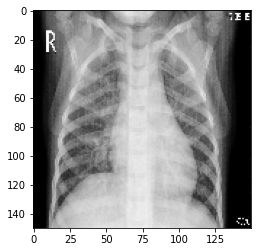

In [15]:
plt.imshow(train_images[0], cmap="gray")
print("class", train_labels[0])
plt.show()

class 0.0


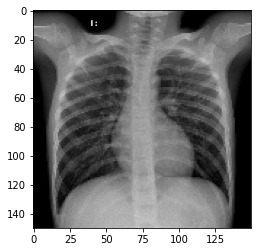

In [47]:
plt.imshow(train_images[3000], cmap="gray")
print("class", train_labels[3000])
plt.show()

/opt/anaconda3/envs/t-tutorial/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

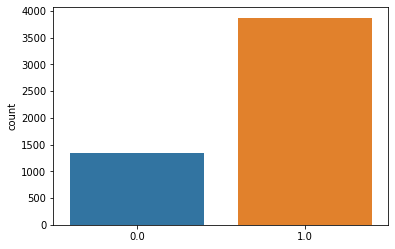

In [50]:
import seaborn as sns
sns.countplot(train_labels)

# ANOVA Model

In [6]:
from scipy.stats import f_oneway

stat, p = f_oneway(val_images[0].flatten(),val_images[1].flatten(),val_images[2].flatten(),val_images[3].flatten(),
                  val_images[4].flatten(),val_images[5].flatten(),val_images[6].flatten(),val_images[7].flatten(),
                  val_images[8].flatten(),val_images[9].flatten(),val_images[10].flatten(),val_images[11].flatten(),
                  val_images[12].flatten(),val_images[13].flatten(),val_images[14].flatten(),val_images[15].flatten())
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


stat=7619.679, p=0.000
Probably different distributions


The images are distinguishable from eachother.  

# Logistic Regression Model

In [51]:
nsamples, nx, ny, nc =train_images.shape
train_images_reshaped = train_images.reshape(nsamples, nx*ny*nc)

In [53]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

logistic_regression.fit(train_images_reshaped, train_labels)

/opt/anaconda3/envs/t-tutorial/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
y_hat_lr = logistic_regression.predict(train_images_reshaped)

In [57]:
from sklearn.model_selection import cross_val_score

lr_cv_score = cross_val_score(logistic_regression, train_images_reshaped, train_labels, cv=5)
mean_lr_cv_score = np.mean(lr_cv_score)

print(f"Mean Cross Validation Score: {mean_lr_cv_score :.2%}")

/opt/anaconda3/envs/t-tutorial/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/t-tutorial/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Mean Cross Validation Score: 96.11%


In [55]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def Metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [56]:
Metrics(train_labels, y_hat_lr)

Precision Score: 0.9987093443469283
Recall Score: 0.9984516129032258
Accuracy Score: 0.9978911042944786
F1 Score: 0.9985804619950962


In [60]:
from sklearn.metrics import confusion_matrix
print('\nConfusion Matrix')
print('----------------')
cm=pd.DataFrame(confusion_matrix(train_labels, y_hat_lr))
cm


Confusion Matrix
----------------


,0,1
0,1336,5
1,6,3869


AUC: 0.9973615260638425


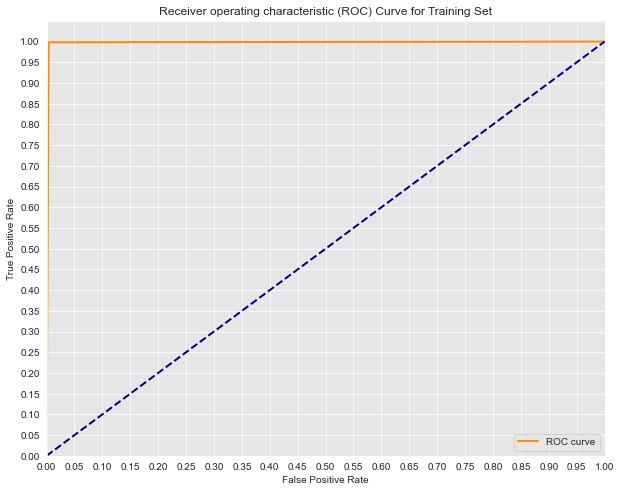

In [61]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
%matplotlib inline

false_positive_train_rate_lr, true_positive_train_rate_lr, thresholds = roc_curve(train_labels, y_hat_lr)
roc_auc = auc(false_positive_train_rate_lr, true_positive_train_rate_lr)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})


plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_train_rate_lr, true_positive_train_rate_lr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(false_positive_train_rate_lr, true_positive_train_rate_lr)))
plt.show()

# CNN Model

In [14]:
import tensorflow as tf
from tensorflow import keras

A convolutional neural network (CNN) has an input, output, and multiple hidden layers. The hidden layers have a series of convolutional layers that convolve through the dot product between the filter weights and the values underneath the filter. A filter is the dimensionality of the output space convolution. Kernel size specifies the dimensionality of the filter. The activation function used for this model is a ReLU layer, a nonlinear activation function. The activation function is followed by additional convolutions such as pooling layers, which reduce the dimensions of the data by combining the outputs of neurons at one layer with the filters at the other layer into a single neuron in the next layer through the dot product, fully connected layers, which are where all the inputs from one layer are connected to every activation unit of the next layer, and normalization dropout layers, which normalize the inputs by randomly deactivating some neurons to avoid overfitting the data.  These layers are referred to as hidden layers because their inputs and outputs are hidden by the activation function and final convolution.

This model begins with 64 filters with a kernel size of 7, 128 filters with a kernel size of 3, and then 256 filters with a kernel size of 3. The model has pooling layers with a size of 2 and dropout with a value of .5.  The model finishes with a binary output.

In [46]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, input_shape=[150, 150, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax'),
])

The Loss value implies how poorly the model is after each iteration of optimization.  Cross-entropy loss increases as the predicted probability diverges from the actual label.  The optimizer alters the model weights and learning rate to reduce the loss.  Nadam combines Nestov Accelerated Gradient (NAG) and Adaptive Moment Estimation (Adam).  NAG measures the gradient of the cost function slightly ahead of the current position in the direction of the momentum.  Adam computes individual adaptive learning rates for different parameters from estimates of moments of the gradients.  Accuracy measures how accurate the model prediction is compared to the data.  

In [47]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))
score = model.evaluate(test_images, test_labels)
y_pred = model.predict(train_images)

Epoch 1/10
163/163 [==============================] - 345s 2s/step - loss: 0.6870 - accuracy: 0.7214 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 322s 2s/step - loss: 0.4771 - accuracy: 0.7464 - val_loss: 0.6931 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 325s 2s/step - loss: 0.7971 - accuracy: 0.7368 - val_loss: 0.6219 - val_accuracy: 0.5625
Epoch 4/10
163/163 [==============================] - 324s 2s/step - loss: 0.5339 - accuracy: 0.7801 - val_loss: 0.5052 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 326s 2s/step - loss: 0.2828 - accuracy: 0.8773 - val_loss: 0.3324 - val_accuracy: 0.8750
Epoch 6/10
163/163 [==============================] - 326s 2s/step - loss: 0.1937 - accuracy: 0.9097 - val_loss: 0.3559 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 327s 2s/step - loss: 0.1549 - accuracy: 0.9262 - val_loss: 0.3850 - val_accuracy: 0.8125

The graph shows that accuracy increases and loss decreases as the epochs increase for both the training and validation set. 

<function matplotlib.pyplot.show(close=None, block=None)>

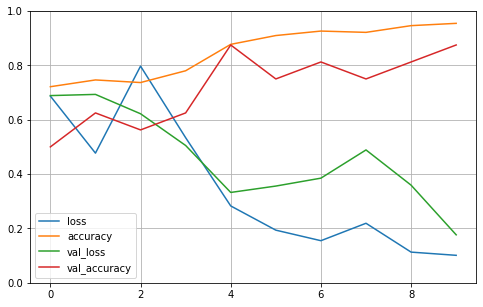

In [48]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

The mean and standard deviation of the train and validation sets are similar, showing that the validation set is a good representation of the training set.  The Anova test showed that the images are distinguishable from eachother.  the logististic regression classified the images with 99% accuracy.  The convolutional nueral network classified the images with 10% loss and 95% accuracy.  